In [23]:
import numpy as np
from scipy import ndimage
import sys, os
from IPython.display import display
from IPython.display import Image as _Imgdis

In [24]:
folder = "digits_image"
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

Working with 14864 images
Image examples: 
0_0_2021-01-07_0700.png


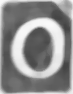

1_3_2021-04-08_0100.png


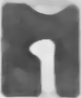

2_3_2021-04-29_0700.png


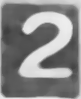

7_2_2021-03-05_1700.png


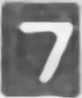

In [34]:
folder = "digits_image"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

train_files = []
test_files = []

for i in range(len(onlyfiles)):
    if i%10: train_files.append(onlyfiles[i])
    else: test_files.append(onlyfiles[i])
    if not i%4000: 
        print(onlyfiles[i])
        display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=60, height=80))

In [42]:
# Original Dimensions
image_width = 28
image_height = 28

trainset = np.ndarray(shape=(len(train_files), image_height, image_width), dtype=np.float32)
testset = np.ndarray(shape=(len(test_files), image_height, image_width), dtype=np.float32)

train_labels = []
test_labels = []

i = 0
for _file in train_files:
    img = Image.open(folder + "/" + _file)  # this is a PIL image
    img = img.resize((image_width, image_height))
    x = np.array(img)
    trainset[i] = x
    train_labels.append(int(_file[0]))
    if i % 1000 == 0: print("%d images to train array" % i)
    i += 1
print("%d images to array!"%i)

i = 0
for _file in test_files:
    img = Image.open(folder + "/" + _file)  # this is a PIL image
    img = img.resize((image_width, image_height))
    x = np.array(img)
    testset[i] = x
    test_labels.append(int(_file[0]))
    if i % 100 == 0: print("%d images to test array" % i)
    i += 1
print("%d images to array!"%i)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

0 images to train array
1000 images to train array
2000 images to train array
3000 images to train array
4000 images to train array
5000 images to train array
6000 images to train array
7000 images to train array
8000 images to train array
9000 images to train array
10000 images to train array
11000 images to train array
12000 images to train array
13000 images to train array
13377 images to array!
0 images to test array
100 images to test array
200 images to test array
300 images to test array
400 images to test array
500 images to test array
600 images to test array
700 images to test array
800 images to test array
900 images to test array
1000 images to test array
1100 images to test array
1200 images to test array
1300 images to test array
1400 images to test array
1487 images to array!


In [43]:
np.savez_compressed('numbers', trainset=trainset, train_labels=train_labels, testset=testset, test_labels=test_labels)